In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/ColabNotebooks/filtered_en-fr.csv', nrows=200000)
len(df)

200000

In [ ]:
!pip install transformers[torch]
!pip install peft
!pip install bitsandbytes
!pip install sacrebleu
!pip install matplotlib
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 7.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
!pip install accelerate -U
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 15.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, MT5ForConditionalGeneration, BitsAndBytesConfig
from torch.utils.data import Dataset, DataLoader
import torch
from torch.optim import AdamW
import os,shutil
import evaluate
import numpy as np
from accelerate import Accelerator
import matplotlib.pyplot as plt

os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'
torch.cuda.empty_cache()

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)
model = MT5ForConditionalGeneration.from_pretrained("google/mt5-small", quantization_config=bnb_config)
tokenizer = AutoTokenizer.from_pretrained("google/mt5-small")
print("Original DataFrame:")
print(df.head())
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
print("Shuffled DataFrame:")
print(df_shuffled.head())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now set to True since model is quantized.


pytorch_model.bin:   0%|          | 0.00/1.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


Original DataFrame:
                                                  en  \
0  Give your listeners a signal that you are wrap...   
1  • Federal institutional governance ($3 billion...   
2                 The "placebo" or "healing" effect.   
3                                 VACUUM CLEANERS 10   
4       • 630-A-1992 — Cancellation - Alkan Air Ltd.   

                                                  fr  
0  Exemple : « Pouvons-nous nous permettre de le ...  
1  • Gouvernance des institutions fédérales (3 MM...  
2            L'effet " placebo " ou " de guérison ".  
3                - Remorques servant d'habitation 10  
4         • 630-A-1992 — Annulation - Alkan Air Ltd.  
Shuffled DataFrame:
                                                  en  \
0          Of the estimated 21.52 investigations per   
1  The first is "Fifty-Five Plus", which is a Man...   
2               Women in senior government positions   
3  Directorate of Social and Economic Analyis, De...   
4            

In [ ]:
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

num_rows = len(df_shuffled)
num_train = int(num_rows * train_ratio)
num_validation = int(num_rows * validation_ratio)
num_test = num_rows - num_train - num_validation

train_df = df_shuffled.iloc[:num_train]
validation_df = df_shuffled.iloc[num_train:num_train + num_validation]
test_df = df_shuffled.iloc[num_train + num_validation:]

train_df.reset_index(drop=True, inplace=True)
validation_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print("Training dataframe shape:", train_df.shape)
print("Validation dataframe shape:", validation_df.shape)
print("Test dataframe shape:", test_df.shape)

Training dataframe shape: (160000, 2)
Validation dataframe shape: (20000, 2)
Test dataframe shape: (20000, 2)


In [ ]:
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

In [ ]:
prefix = 'translate English to French: '

In [ ]:
!pip install datasets

In [ ]:
def pair_columns(dataframe):
    text_pairs = []
    for i in range(0, dataframe.shape[0]):
        text_pairs.append((dataframe['en'][i], dataframe['fr'][i]))
    return text_pairs

In [ ]:
def preprocess_function(text_pairs):
    en_sentence, fr_sentence = zip(*text_pairs)
    inputs = [prefix + str(text) for text in en_sentence]
    targets = fr_sentence
    model_inputs = tokenizer(inputs, text_target=targets, max_length=64, truncation=True)
    return model_inputs

In [ ]:
tokenized_train = preprocess_function(pair_columns(train_df))
tokenized_val = preprocess_function(pair_columns(validation_df))
tokenized_test = preprocess_function(pair_columns(test_df))

In [ ]:
print(tokenized_train)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(tokenized_val)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

model = AutoModelForSeq2SeqLM.from_pretrained("google/mt5-small", quantization_config=bnb_config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
`low_cpu_mem_usage` was None, now set to True since model is quantized.


In [ ]:
train_dataset = TranslationDataset(tokenized_train)
print(train_dataset)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import MT5ForConditionalGeneration, Trainer, TrainingArguments
import nltk
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import sentence_bleu

class TranslationDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

    def __len__(self):
        return len(self.encodings.input_ids)


train_dataset = TranslationDataset(tokenized_train)
val_dataset = TranslationDataset(tokenized_val)
model.train()

from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training

training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    num_train_epochs=6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    logging_dir="./logs",
    logging_steps=2000,
    evaluation_strategy="steps",
    eval_steps=2000,
    save_steps=2000,
    warmup_steps=500,
    save_total_limit=2,
    learning_rate=2e-5,
    optim="paged_adamw_8bit",
)


model = MT5ForConditionalGeneration.from_pretrained("google/mt5-small", quantization_config=bnb_config)
model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)
config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["q", "v"],
    lora_dropout=0.05,
    bias="none",
    task_type="SEQ_2_SEQ_LM"
)
model = get_peft_model(model, config)
model.print_trainable_parameters()


trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)


trainer.train()
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

160000


In [ ]:
trainer.save_model("./mt5-qlora-200k")
tokenizer.save_pretrained("./mt5-qlora-200k")
model_path = "./mt5-qlora-200k"
model = MT5ForConditionalGeneration.from_pretrained(model_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[{'loss': 13.957, 'grad_norm': 12.263374328613281, 'learning_rate': 1.898305084745763e-05, 'epoch': 0.4, 'step': 2000}, {'eval_loss': 4.3976640701293945, 'eval_runtime': 73.1439, 'eval_samples_per_second': 273.434, 'eval_steps_per_second': 8.545, 'epoch': 0.4, 'step': 2000}, {'loss': 5.6818, 'grad_norm': 2.0105326175689697, 'learning_rate': 1.76271186440678e-05, 'epoch': 0.8, 'step': 4000}, {'eval_loss': 3.8693203926086426, 'eval_runtime': 73.2001, 'eval_samples_per_second': 273.224, 'eval_steps_per_second': 8.538, 'epoch': 0.8, 'step': 4000}, {'loss': 5.2709, 'grad_norm': 2.7626121044158936, 'learning_rate': 1.6271186440677967e-05, 'epoch': 1.2, 'step': 6000}, {'eval_loss': 3.76541805267334, 'eval_runtime': 73.3716, 'eval_samples_per_second': 272.585, 'eval_steps_per_second': 8.518, 'epoch': 1.2, 'step': 6000}, {'loss': 5.1105, 'grad_norm': 2.5417497158050537, 'learning_rate': 1.4915254237288137e-05, 'epoch': 1.6, 'step': 8000}, {'eval_loss': 3.714766025543213, 'eval_runtime': 73.088,

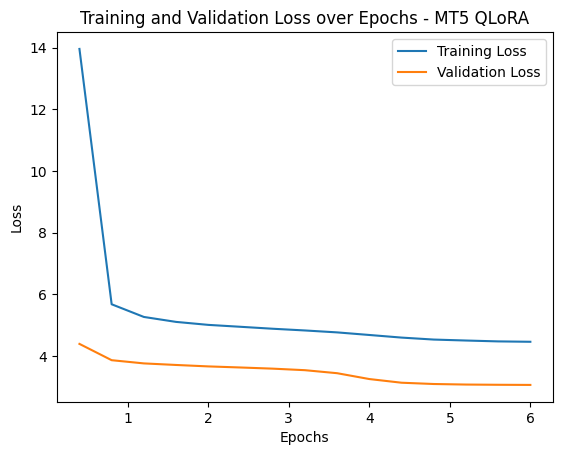

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

train_logs = trainer.state.log_history
print(train_logs)

train_loss = []
val_loss = []
train_epochs = []

num_steps = 0

for log in train_logs:
    if 'loss' in log:
        train_loss.append(log['loss'])
    if 'eval_loss' in log:
        val_loss.append(log['eval_loss'])
        current_epoch = len(val_loss) * training_args.eval_steps / len(train_dataset) * training_args.per_device_train_batch_size
        train_epochs.append(current_epoch)
        num_steps += training_args.eval_steps

min_len = min(len(train_loss), len(val_loss))
train_loss = train_loss[:min_len]
val_loss = val_loss[:min_len]

plt.plot(train_epochs[:min_len], train_loss, label='Training Loss')
plt.plot(train_epochs[:min_len], val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs - MT5 QLoRA')
plt.legend()
plt.show()

In [ ]:
def translate_text(text, model, tokenizer):
    inputs = tokenizer.encode("translate English to French: " + text, return_tensors="pt")
    outputs = model.generate(inputs, max_length=64, num_beams=4, early_stopping=True)
    translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return translated_text

In [ ]:
train_df.to_csv('train.csv', index=False)
validation_df.to_csv('validation.csv', index=False)
test_df.to_csv('test.csv', index=False)
df = pd.read_csv('test.csv', nrows = 200)
print(df)
print(len(df))

                                                    en  \
0    The most appropriate approach would be the ado...   
1    In the afternoon, the Ombudsman will speak on ...   
2                               B) Temporary Retention   
3    Final sampling was undertaken in fiscal year 2...   
4    The results must indicate a "Pass" for all 26 ...   
..                                                 ...   
195       • (b) total quantity, in kilograms, imported   
196  Data has been collected on the use of alternat...   
197    • Action Items to be circulated within 3 weeks.   
198             More specifically, this plan includes:   
199  The appellant argued that the product in issue...   

                                                    fr  
0    La meilleure façon d’agir serait la création d...  
1    "Le Médiateur européen et la citoyenneté europ...  
2                              B) Rétention temporaire  
3    L’échantillonnage final a été entrepris en 200...  
4    Les résultats

In [ ]:
!pip install unbabel-comet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.7/529.7 kB 30.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
from nltk.translate.bleu_score import sentence_bleu
from evaluate import load
from nltk.translate.bleu_score import corpus_bleu
import numpy as np
import pandas as pd
comet_metric = load('comet')

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

model.ckpt:   0%|          | 0.00/2.32G [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

LICENSE:   0%|          | 0.00/9.69k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.53k [00:00<?, ?B/s]

hparams.yaml:   0%|          | 0.00/567 [00:00<?, ?B/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.2.4. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:188: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


### Calculating BLUE and COMET for model 200k data

In [ ]:
source = df['en'].tolist()
hypothesis = [translate_text(text, model, tokenizer) for text in source]
reference = df['fr'].tolist()

#COMET score
comet_results = comet_metric.compute(predictions=hypothesis, references=reference, sources=source)

#BLUE score
def calculate_bleu_score(reference, candidate):
    return corpus_bleu([[ref] for ref in reference], candidate)

bleu_scores = [calculate_bleu_score([ref], [hyp]) for ref, hyp in zip(reference, hypothesis)]

average_bleu_score = sum(bleu_scores) / len(bleu_scores)

average_comet_score = np.mean(comet_results["scores"])

print("Average BLUE score", average_bleu_score)
print("Average COMET score", average_comet_score)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a d

Average BLUE score 0.26487826072841497
Average COMET score 0.5170456299930811


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:
num_rows_validation = 20000
num_blue_test = int(num_rows_validation * 0.01)
blue_test_df = test_df.iloc[:num_blue_test]
new_validation_df = validation_df.iloc[num_blue_test:]
blue_test_df.reset_index(drop=True, inplace=True)
new_validation_df.reset_index(drop=True, inplace=True)
print("Blue test dataframe shape:", blue_test_df.shape)
print("New validation dataframe shape:", new_validation_df.shape)

Blue test dataframe shape: (200, 2)
New validation dataframe shape: (19800, 2)


In [ ]:
for index, row in blue_test_df.iterrows():
    original_sentence = row['en']
    reference_sentence = row['fr']
    translated_sentence = translate_text(original_sentence, model, tokenizer)
    print("Original (English):", original_sentence)
    print("Reference (French):", reference_sentence)
    print("Model Translated (French):", translated_sentence)
    print()

Original (English): The most appropriate approach would be the adoption of a code of conduct.
Reference (French): La meilleure façon d’agir serait la création d’un code de déontologie.
Model Translated (French): <extra_id_0> est l’adoption d’un code de conducte.

Original (English): In the afternoon, the Ombudsman will speak on the topic:
Reference (French): "Le Médiateur européen et la citoyenneté européenne".
Model Translated (French): Manche à l’afternoon, les ombudsmans sont à la question:

Original (English): B) Temporary Retention
Reference (French): B) Rétention temporaire
Model Translated (French): <extra_id_0> A) Temporary Retention à l’activité de l’activité :

Original (English): Final sampling was undertaken in fiscal year 2002-2003.
Reference (French): L’échantillonnage final a été entrepris en 2002-2003.
Model Translated (French): Les samplings ont été organisées en septembre 2002.

Original (English): The results must indicate a "Pass" for all 26 validation testes.
Refer

In [ ]:
import nltk
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import sentence_bleu

def calculate_bleu_score(reference_translations, translated_sentences):
    reference_tokenized = [[sentence.split()] for sentence in reference_translations]
    translated_tokenized = [sentence.split() for sentence in translated_sentences]
    bleu_score = corpus_bleu(reference_tokenized, translated_tokenized)
    return bleu_score

def translate_text(text, model, tokenizer):
    inputs = tokenizer.encode("translate English to French: " + text, return_tensors="pt")
    outputs = model.generate(inputs, max_length=64, num_beams=4, early_stopping=True)
    translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return translated_text

reference_translations = blue_test_df['fr'].tolist()

translated_sentences = []


for index, row in blue_test_df.iterrows():
    original_sentence = row['en']
    translated_sentence = translate_text(original_sentence, model, tokenizer)
    translated_sentences.append(translated_sentence)


    print("Original (English):", original_sentence)
    print("Translated (French):", translated_sentence)
    print()

bleu_score = calculate_bleu_score(reference_translations, translated_sentences)
print("BLEU Score:", bleu_score)

Original (English): What is generally in the federal government benefits package?
Translated (French): Les benefits sont générales en l’Etat de l’Etat?

Original (English): Other remedial work suggested in the Draft Report be undertaken.  17.
Translated (French): Une étude de l’étude de l’étude de la Draft Report a été prise. 17.

Original (English): Announcement Dramamuse presents Once upon a Pizzeria
Translated (French): Le présentation Dramamuse présente Onceupon à la Pizzeria.

Original (English): As a result, section 7 of the Charter is inapplicable in the present case.
Translated (French): Les sections 7 de la Charte est inapplicable dans la présent situation.

Original (English): Both the prosecution and the applicant appealed.
Translated (French): La prosecution et la plainte ont été refusées.

Original (English): This initiative will enhance the bilateral relationship with France.
Translated (French): Les initiatives ont améliorer la relation avec France.

Original (English): 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
from google.colab import drive
from transformers import Trainer

drive.mount('/content/drive')
model_path = "/content/drive/My Drive/mt5-qlora-200k"

# Save the model
trainer.save_model(model_path)
tokenizer.save_pretrained(model_path)

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


('/content/drive/My Drive/mt5-qlora-200k/tokenizer_config.json',
 '/content/drive/My Drive/mt5-qlora-200k/special_tokens_map.json',
 '/content/drive/My Drive/mt5-qlora-200k/spiece.model',
 '/content/drive/My Drive/mt5-qlora-200k/added_tokens.json',
 '/content/drive/My Drive/mt5-qlora-200k/tokenizer.json')

In [ ]:
import shutil
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Source directory (all files you want to save)
logs_directory = "/content/logs"
results_directory = "/content/results"

# Destination directory in Google Drive
destination_directory = "/content/drive/My Drive/mt5_qlora-200k"

# Copy all files from source directory to destination directory
shutil.copytree(logs_directory, "/content/drive/My Drive/mt5-qlora-200k/logs")
shutil.copytree(results_directory, "/content/drive/My Drive/mt5-qlora-200k/results")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/My Drive/mt5-qlora-200k/results'